<a href="https://colab.research.google.com/github/Rajshinde07/Handwritten-Digits-Recognizer/blob/master/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
np.random.seed(123)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import keras.backend as k

In [0]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
img_rows, img_cols = 28, 28

In [0]:
if k.image_data_format() == "channel_first":
  X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_rows)
  X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_rows,1)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
  input_shape = (img_rows, img_cols, 1)

In [42]:
print(X_train.shape)

(60000, 28, 28)


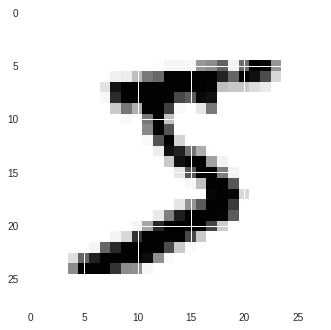

In [43]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [45]:
print(X_train.shape)

(60000, 1, 28, 28)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [47]:
y_train.shape

(60000,)

In [48]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [0]:
#Convert 1 dimensional array  into 10 dim class matrices

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [50]:
y_train.shape

(60000, 10)

In [0]:
model = Sequential()

In [0]:
model.add(Convolution2D(32,(3,3), activation='relu', input_shape=input_shape))
model.add(Convolution2D(64,(3,3), activation='relu'))

In [67]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [0]:
import keras
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [72]:
model.fit(X_train, y_train, batch_size=128, epochs=12, verbose=1, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 166s 3ms/step - loss: 0.2696 - acc: 0.9181 - val_loss: 0.0554 - val_acc: 0.9823
Epoch 2/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0869 - acc: 0.9741 - val_loss: 0.0408 - val_acc: 0.9867
Epoch 3/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0682 - acc: 0.9802 - val_loss: 0.0328 - val_acc: 0.9894
Epoch 4/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0546 - acc: 0.9834 - val_loss: 0.0295 - val_acc: 0.9896
Epoch 5/12
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0475 - acc: 0.9857 - val_loss: 0.0395 - val_acc: 0.9879
Epoch 6/12
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0423 - acc: 0.9872 - val_loss: 0.0289 - val_acc: 0.9902
Epoch 7/12
60000/60000 [==============================] - 166s 3ms/step - 

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)

In [74]:
print("loss:",score[0],"\nAccuracy:",score[1])

loss: 0.02798606719486147 
Accuracy: 0.9927
